In [1]:
import numpy as np

import torch
from torch import nn
from torch import functional as F

from livelossplot import PlotLosses

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from Inference.BBVI import VariationalNetwork
from Inference.VariationalBoosting import MixtureVariationalNetwork
from Inference.VariationalBoosting import VariationalBoostingOptimizer

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [4]:
sigma_noise = 0.1
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [26]:
mix = MixtureVariationalNetwork(1, 1, 5, 3, device=device)

In [27]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.2}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

In [28]:
vboptimizer = VariationalBoostingOptimizer(mixture=mix, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.0001)

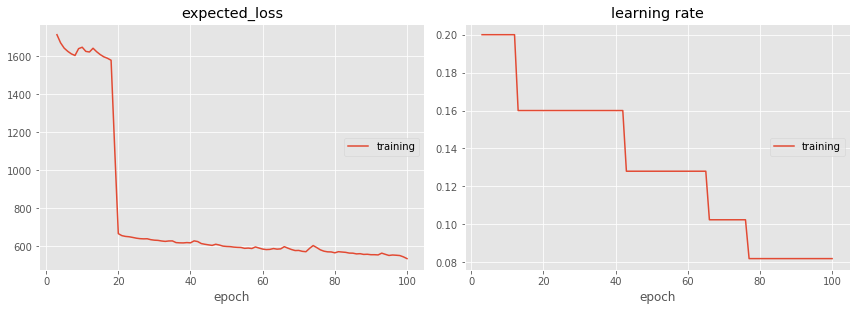

expected_loss:
training   (min:  533.771, max: 70447.586, cur:  533.771)

learning rate:
training   (min:    0.082, max:    0.200, cur:    0.082)


In [29]:
mix = vboptimizer.run((x_data,y_data), nb_component=1, n_epoch=100, n_iter=50, n_ELBO_samples=50, plot=True)

In [30]:
mix.pi

tensor([1.], device='cuda:0')

In [31]:
model = mix

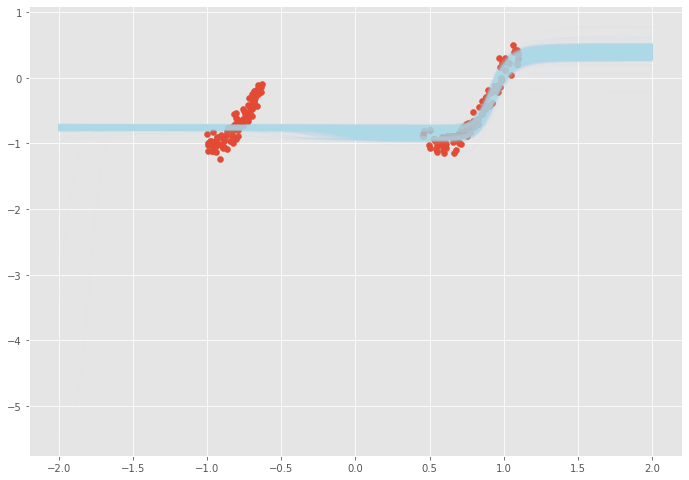

In [32]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    model.sample_parameters()

    y_test = model.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')